<a href="https://colab.research.google.com/github/Gayatri8-sys/Machine-Learning/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas openpyxl

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
xl = pd.ExcelFile("/content/EastWestAirlines.xlsx")

In [ ]:
print(xl.sheet_names)

['Description', 'data']


In [ ]:
df = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name="data")

In [ ]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
df.dtypes

,0
ID#,int64
Balance,int64
Qual_miles,int64
cc1_miles,int64
cc2_miles,int64
cc3_miles,int64
Bonus_miles,int64
Bonus_trans,int64
Flight_miles_12mo,int64
Flight_trans_12,int64


In [ ]:
df = df.drop(columns='ID#')

In [ ]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
features = df[['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']]

In [ ]:
features.isnull().sum()

,0
Balance,0
Qual_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

# K Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]  # to store K values

for i in range(1,11):
  Kmeans_model = KMeans(n_clusters=i, random_state=42)
  Kmeans_model.fit(scaled_features)
  wcss.append(Kmeans_model.inertia_)

In [ ]:
wcss

[27993.00000000005,
 21991.377894785703,
 18136.975290898703,
 16153.49040777623,
 13519.675066868009,
 12159.872873083712,
 11051.844890810622,
 10566.190455057125,
 9481.492994772518,
 9042.209391174365]

Text(0, 0.5, 'WCSS')

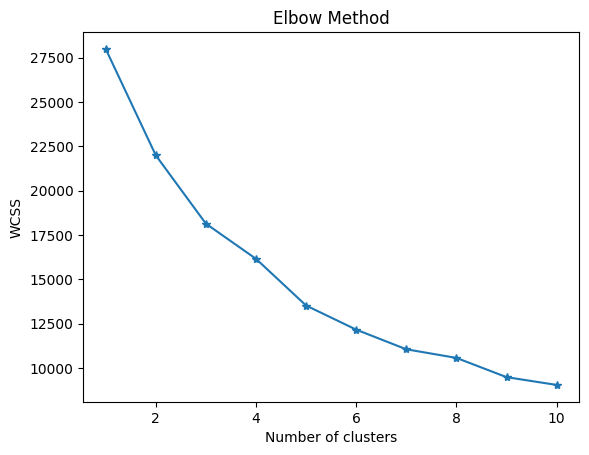

In [ ]:
import matplotlib.pyplot as plt

# Elbow Method

plt.plot(range(1,11), wcss, marker='*')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [ ]:
# k values can be 3, 5

In [ ]:
clf = KMeans(n_clusters = 6).fit(scaled_features)

In [ ]:
clf

KMeans(n_clusters=6)

In [ ]:
y=clf.predict(scaled_features)

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [ ]:
clf.cluster_centers_

array([[-0.35916162, -0.13990984, -0.45637773, -0.44682698, -0.20057032,
        -0.21557639, -0.90313575],
       [ 0.32294605, -0.09360551,  1.14495999,  0.98651906, -0.01974407,
        -0.01599399,  0.27377265],
       [ 4.36001148,  0.14081094,  1.84100333,  0.97870267,  0.64439956,
         0.84742718,  0.99558515],
       [ 0.52848824,  0.3763211 ,  0.52932885,  1.74088773,  4.19448242,
         4.35879116,  0.13632407],
       [-0.1707662 , -0.11926014, -0.40157948, -0.35015804, -0.18283736,
        -0.19886862,  0.84647931],
       [ 0.40104822,  6.97963892,  0.08496946,  0.07251624,  0.34264606,
         0.38256881, -0.11932141]])

In [ ]:
scaled_df=pd.DataFrame(scaled_features, columns=features.columns)

In [ ]:
scaled_df

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


In [ ]:
scaled_df['Clusters']=y

In [ ]:
scaled_df

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,4
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,4
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,4
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,4
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975,1
...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,0
3995,-0.091465,-0.186299,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,0
3996,-0.000043,-0.186299,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,0
3997,-0.185607,-0.186299,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0


<Axes: xlabel='Balance', ylabel='Qual_miles'>

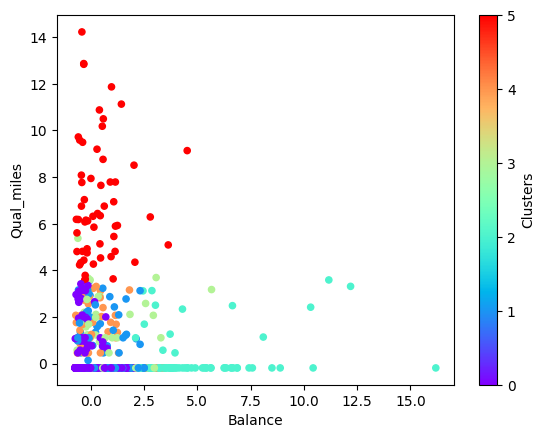

In [ ]:
scaled_df.plot( x='Balance', y='Qual_miles', kind='scatter', c='Clusters', cmap='rainbow')

<Axes: xlabel='Bonus_miles', ylabel='Bonus_trans'>

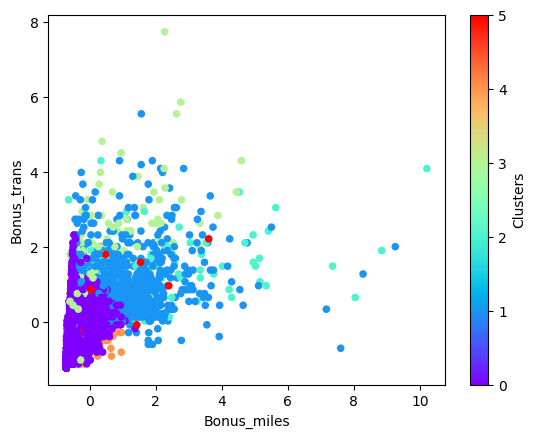

In [ ]:
scaled_df.plot( x='Bonus_miles', y='Bonus_trans', kind='scatter', c='Clusters', cmap='rainbow')

In [ ]:
# silhouette score
from sklearn.metrics import silhouette_score
score_kmeans = silhouette_score(scaled_df, y)

In [ ]:
scores = []
for _ in range(10):
    kmeans = KMeans(n_clusters=6)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    scores.append(score)
    print(f"Silhouette score: {score:.4f}")

print(f"Avg silhouette score over 10 runs: {np.mean(scores):.4f}")

Silhouette score: 0.3694
Silhouette score: 0.4834
Silhouette score: 0.4834
Silhouette score: 0.4834
Silhouette score: 0.3649
Silhouette score: 0.4834
Silhouette score: 0.4834
Silhouette score: 0.3690
Silhouette score: 0.4834
Silhouette score: 0.4834
Avg silhouette score over 10 runs: 0.4487


In [ ]:
score_kmeans

np.float64(0.4834485855662476)

# DBSCAN


In [ ]:
scaled_df.drop(columns='Clusters')

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbor = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbor.fit(scaled_df.drop(columns='Clusters'))

In [ ]:
distances , indices =neighbors_fit.kneighbors(scaled_df.drop(columns='Clusters'))

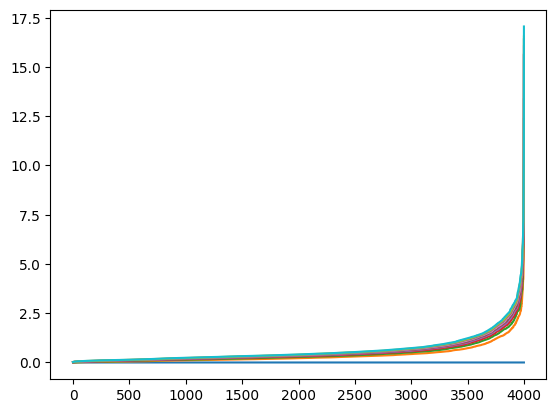

In [ ]:
distances=np.sort(distances, axis=0)
# distances=distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.9, min_samples=10)
dbscan.fit(scaled_df)

DBSCAN(eps=1.9, min_samples=10)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cl = pd.DataFrame(dbscan.labels_, columns=['Cluster'])

In [ ]:
dbscan_df = pd.concat([scaled_df.drop(columns='Clusters'), cl], axis=1)

In [ ]:
dbscan_df

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975,0
...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,0
3995,-0.091465,-0.186299,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,0
3996,-0.000043,-0.186299,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,0
3997,-0.185607,-0.186299,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0


<Axes: xlabel='Balance', ylabel='Qual_miles'>

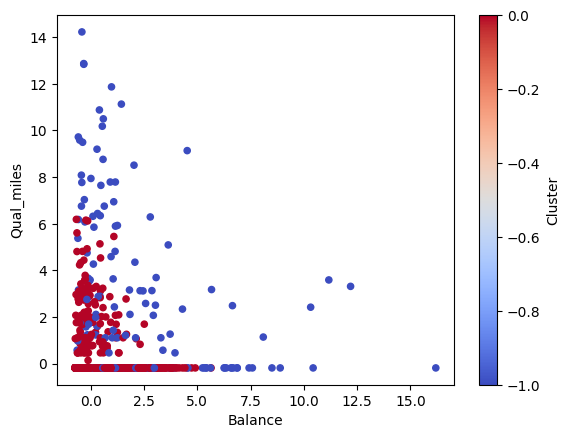

In [ ]:
dbscan_df.plot( x='Balance', y='Qual_miles', kind='scatter', c='Cluster', cmap='coolwarm')

In [ ]:
# silhouette score
from sklearn.metrics import silhouette_score

# Get the non-noise points and their corresponding labels
non_noise_indices = dbscan.labels_ != -1
X_filtered = scaled_df[non_noise_indices]
labels_filtered = dbscan.labels_[non_noise_indices]

# Check the number of unique labels after filtering
unique_labels = np.unique(labels_filtered)

if len(unique_labels) < 2:
    print("Cannot calculate silhouette score: Less than 2 non-noise clusters found.")
else:
    score_dbscan = silhouette_score(X_filtered, labels_filtered)
    print(f"Silhouette score for non-noise points: {score_dbscan}")

Cannot calculate silhouette score: Less than 2 non-noise clusters found.


# Hierarchical


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [ ]:
h_df = scaled_df.drop(columns='Clusters')

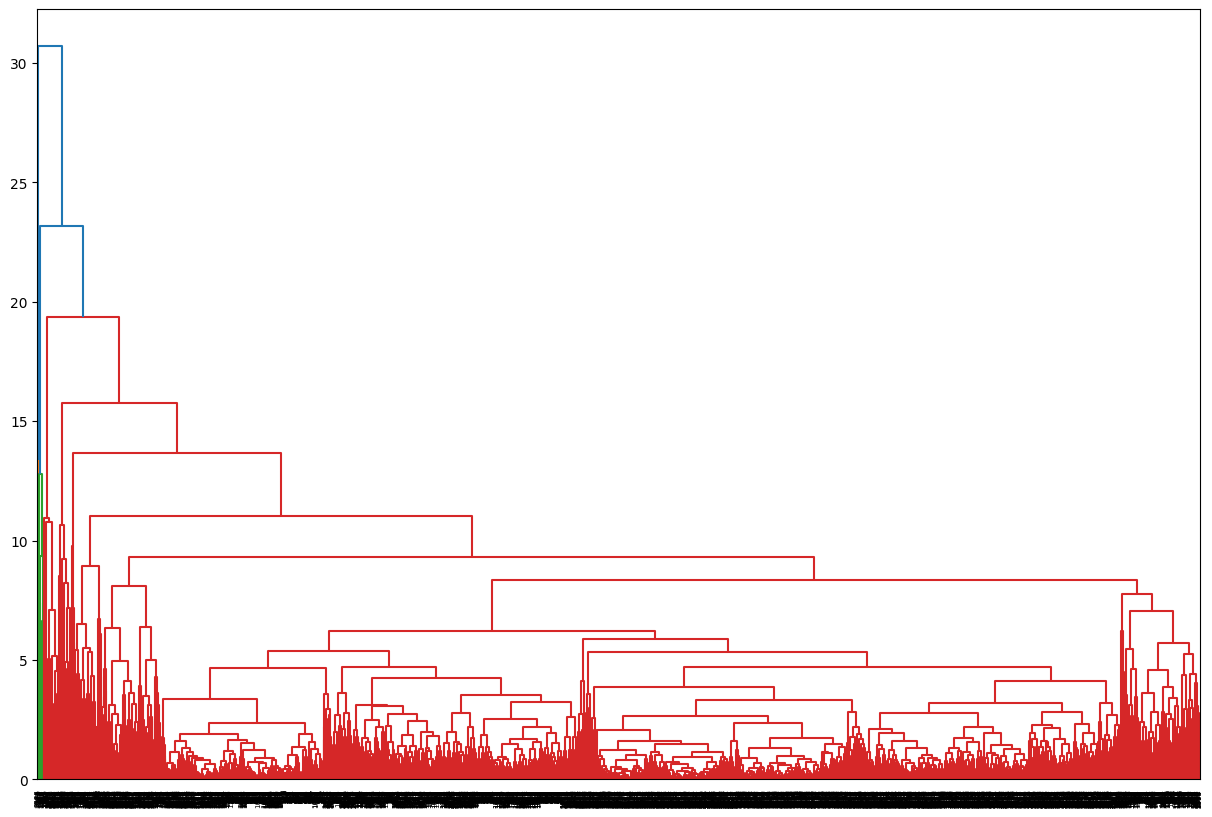

In [ ]:
fig=plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(h_df,method='complete'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')

In [ ]:
y_hc = hc.fit_predict(h_df)

In [ ]:
clusters=pd.DataFrame(y_hc, columns=['Cluster'])

In [ ]:
clusters

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [ ]:
np.unique(clusters)

array([0, 1, 2])

In [ ]:
h_df_concat = pd.concat([h_df, clusters], axis=1)

In [ ]:
h_df_concat

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975,0
...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,0
3995,-0.091465,-0.186299,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,0
3996,-0.000043,-0.186299,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,0
3997,-0.185607,-0.186299,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0


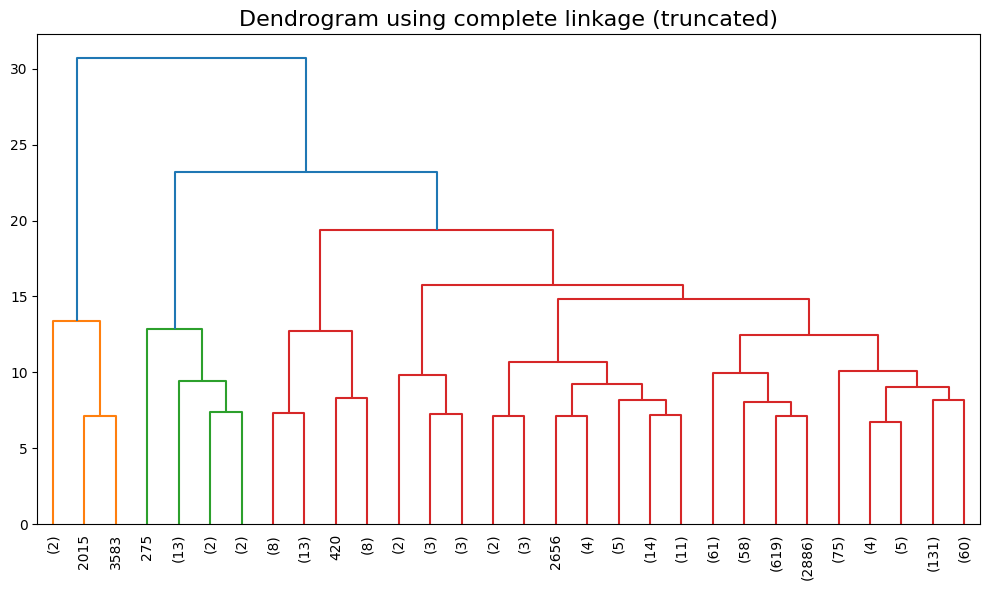

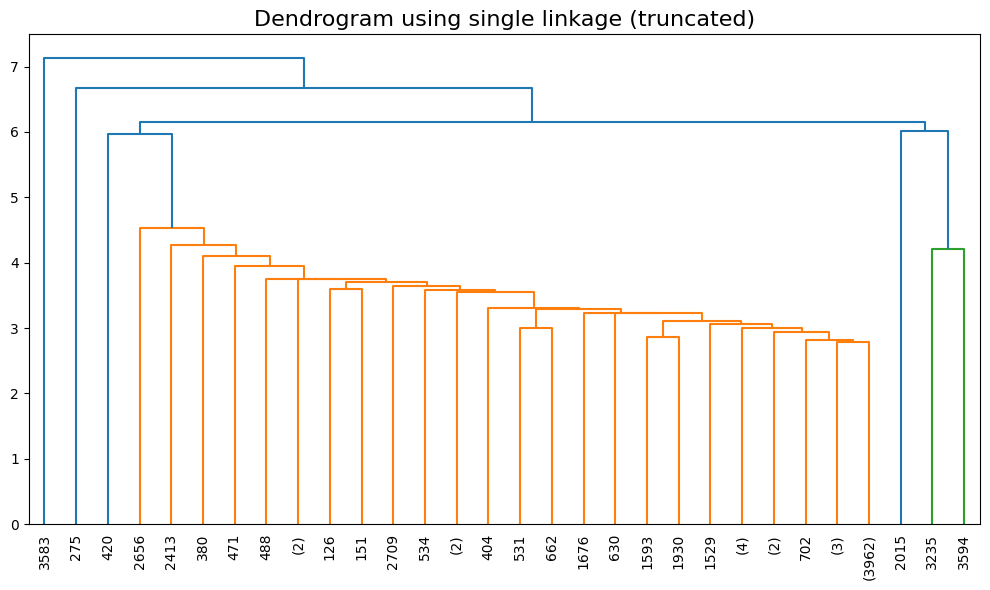

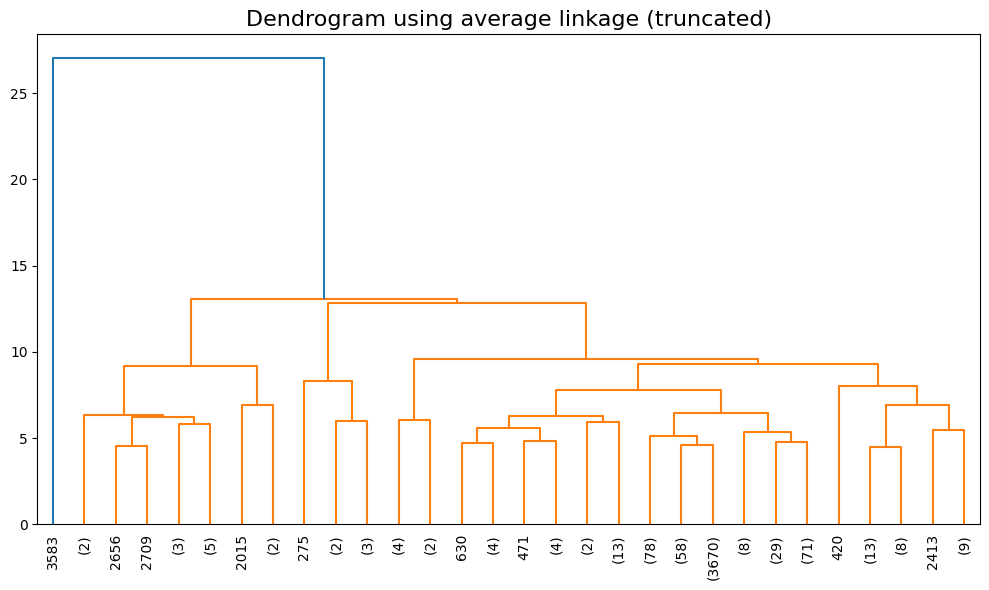

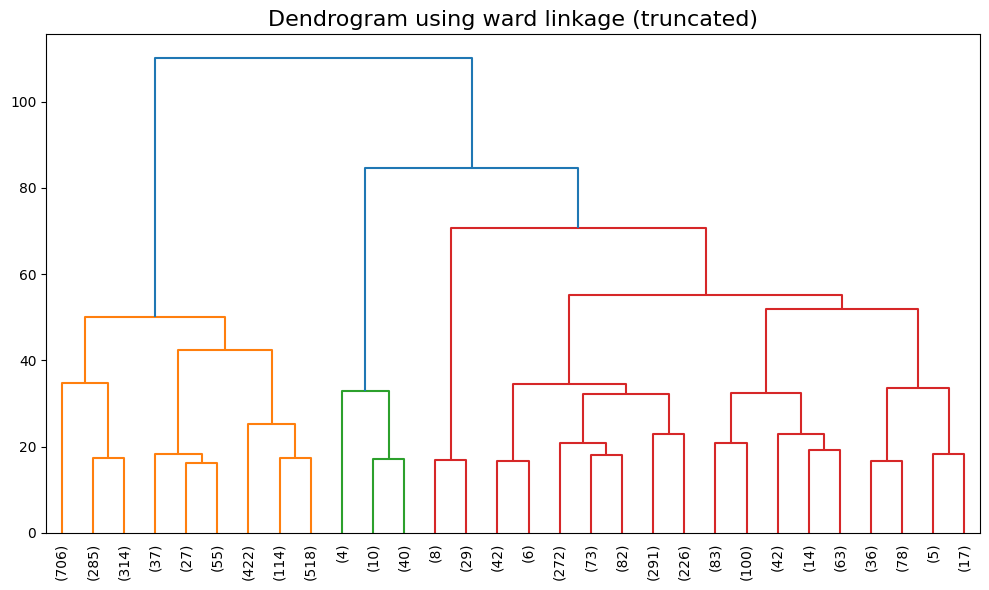

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

methods = ['complete', 'single', 'average', 'ward']

for method in methods:
    plt.figure(figsize=(10,6))
    plt.title(f'Dendrogram using {method} linkage (truncated)', fontsize=16)

    linked = linkage(scaled_df, method=method)

    dendro_plot = dendrogram(
        linked,
        truncate_mode='lastp',
        p=30,
        show_leaf_counts=True,
        leaf_rotation=90.,
        leaf_font_size=10.,
    )

    plt.tight_layout()
    plt.show()

In [ ]:
score_h = silhouette_score(h_df, y_hc)

In [ ]:
score_h

np.float64(0.6889880053092663)

In [ ]:
methods = ['complete', 'average','single','ward']

for i in methods:
  hc=AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage=i)
  y_hc=hc.fit_predict(h_df)
  score_hc=silhouette_score(h_df, y_hc)
  print(f"Score for {i} linkage method is ",score_hc)

Score for complete linkage method is  0.6889880053092663
Score for average linkage method is  0.8280340008161527
Score for single linkage method is  0.8280340008161527
Score for ward linkage method is  0.20042444794127307


For average, single linkage silhouette score is greatest for hierarchical clustering